# Text Analysis in Python 1: Working with Strings & Files

<h1 style="text-align:center;font-size:300%;">The State of the Union is ... long?</h1> 
  <!--<img src="https://miro.medium.com/max/720/1*pp7HX01jBv2wbVRW9Ml_mA.png" style="width:%80;">-->
  <img src = "https://cdn.theatlantic.com/thumbor/7G7_MhUOYg6M8JGSmbQCVoaJ-kY=/126x0:1794x938/1536x864/media/img/2015/01/16/opener_words/original.jpg">

## INTRODUCTION TO TEXT ANALYSIS IN PYTHON
**How can we use computational techniques to analyze texts and then visualize patterns buried within them?** 

**What can we learn about texts by applying text analysis in Python? How do we get started?**

<p>In this session, participants will:</p>

+ Learn how to write basic scripts in Python using Jupyter Notebooks
+ import and pre-process documents
+ analyze each document using word frequencies, collocations, ngram frequencies, etc.


## This Tutorial

In this tutorial and notebook, you will practice working with a dataset or corpus of a well-known series of texts: the yearly State of the Union addresses given by Presidents of the United States since 1790.

For a great resource to learn and gain more practice doing text analysis with Python see the online book: Melanie Walsh, [*Introduction to Cultural Analytics and Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html), Version 1 (2021), https://doi.org/10.5281/zenodo.4411250. 

<img src="https://melaniewalsh.github.io/Intro-Cultural-Analytics/_static/favicon.ico" style="width:30%">

<!--All sections below labeled with a **MW** comes from this book. Please consider supporting that project if you find it useful.-->


## Part I. Getting Started

<h3 style="color:gold">Downloading and Saving Dataset(s)</h3>

??



## This Tutorial

In this tutorial and notebook, you will practice working with a dataset or corpus of a well-known series of texts: the yearly State of the Union addresses given by Presidents of the United States since 1790.

## Part I: Importing Python Packages or Libraries

1. Before beginning, we need to import some packages. Often, we need to install and import customized Python packages (sometimes called "modules") in addition to the core functions (like **print()**, **len()**, **sum()**, and others).

In [19]:
import os, pathlib, glob #these packages allow us to navigate through the files on our own computers
from pathlib import Path #the pathlib package helps us work with file paths
#for more on using pathlib see: https://builtin.com/software-engineering-perspectives/python-pathlib
import pandas as pd #for creating and working with dataframes
import nltk,re #we can import multiple packages on one line using commas to separate new package names
from nltk import RegexpTokenizer 
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag, word_tokenize, sent_tokenize
nltk.download('punkt')
#import matplotlib as plt   #matplotlib and seaborn are used here to create graphs, charts, and other visualizations
import matplotlib.pyplot as plt #needed for xticks
import seaborn as sns

#code below modifies how plots will be shown in this notebook
plt.rcParams['figure.figsize'] = [12, 8]  #changes default figure size to make larger plots
%config InteractiveShellApp.matplotlib = 'inline'
%config InlineBackend.figure_formats = ['svg']

#Press CTRL+Enter to run this codeblock! 

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


1b. If the above prints out the error message: "ModuleNotFoundError: No module named 'nltk'". Uncomment out the code below (by removing the #) and run it. Then run the above cell of code (with all the import commands) again.

In [20]:
#!pip install nltk

<h3 style="color:green;"> Code Together:</h3>

<p style="color:green">2. We will also need to use the "collections" package as well. Let's import that in the code cell below:</p>



In [21]:
#note: when importing packages, Python will only print something out if there is an error. 

#Press CTRL+Enter to run this codeblock!

# Part II: Navigating through the files in a directory (whether on your computer or on a remote server)

<!--1. To work with the State of the Union addresses you downloaded (hereafter: SOTU), we will need to navigate to the folder you placed them in. First, check the "current working directory" that Python is working with:-->
3. To work with our State of the Union address text corpus, we will need to navigate to the folder we placed them in.



In [22]:
print(Path.cwd())  #prints out the current working directory (where Python will look for files unless we specify otherwise)

c:\Users\F0040RP\Documents\DartLib_RDS\intro-to-python


4. Your current working directory, printed out in the previous step, is the location where this notebook is saved. 

In [23]:
list(Path.iterdir(Path.cwd()))

#Do you see the "state of the union dataset" folder in the list below?

[WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/.git'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/4a_TextAnalysis_one_document.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/4b_TextAnalysis_corpus.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/Basics.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/completed_4a_TextAnalysis_one_document.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/completed_4b_TextAnalysis_corpus.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/completed_Dataframes2.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/completed_Files_and_Libraries.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/completed_Lists_and_Loops.ipynb'),
 WindowsPath('c:/Users/F0040RP/Documents/DartLib_RDS/intro-to-python/completed_visualizati

5. Next, we will look inside the "state-of-the-union-dataset" folder containing our corpus of State of the Union speeches (henceforth: SOTU). We can learn something about this dataset simply by examining the titles of the individual files.

In [24]:
sotudir = Path("~/shared/RR-workshop-data/state-of-the-union-dataset/txt").expanduser() 
print(set([item.suffix for item in list(Path.iterdir(sotudir))]))  #get unique suffixes or file extensions in sotudir 
[item.name for item in list(Path.iterdir(sotudir))] #to get filename only

{'.txt'}


['Adams_1797.txt',
 'Adams_1798.txt',
 'Adams_1799.txt',
 'Adams_1800.txt',
 'Adams_1825.txt',
 'Adams_1826.txt',
 'Adams_1827.txt',
 'Adams_1828.txt',
 'Arthur_1881.txt',
 'Arthur_1882.txt',
 'Arthur_1883.txt',
 'Arthur_1884.txt',
 'Buchanan_1857.txt',
 'Buchanan_1858.txt',
 'Buchanan_1859.txt',
 'Buchanan_1860.txt',
 'Buren_1837.txt',
 'Buren_1838.txt',
 'Buren_1839.txt',
 'Buren_1840.txt',
 'Bush_1989.txt',
 'Bush_1990.txt',
 'Bush_1991.txt',
 'Bush_1992.txt',
 'Bush_2001.txt',
 'Bush_2002.txt',
 'Bush_2003.txt',
 'Bush_2004.txt',
 'Bush_2005.txt',
 'Bush_2006.txt',
 'Bush_2007.txt',
 'Bush_2008.txt',
 'Carter_1978.txt',
 'Carter_1979.txt',
 'Carter_1980.txt',
 'Carter_1981.txt',
 'Cleveland_1885.txt',
 'Cleveland_1886.txt',
 'Cleveland_1887.txt',
 'Cleveland_1888.txt',
 'Cleveland_1893.txt',
 'Cleveland_1894.txt',
 'Cleveland_1895.txt',
 'Cleveland_1896.txt',
 'Clinton_1993.txt',
 'Clinton_1994.txt',
 'Clinton_1995.txt',
 'Clinton_1996.txt',
 'Clinton_1997.txt',
 'Clinton_1998.txt'

## Part III: Reading Files and Examining Their Contents

6. Open one SOTU text.

In [25]:
with open(Path(sotudir,"Bush_2002.txt"),encoding='utf-8') as f:
    sotu1 = f.read()

## ** calling utf-8 encoding may not be necessary
## but is good practice if you ever work with foreign languages (besides special characters can appear in English too, as in 
## loan words like naïve and résumé )


##[DISCUSS WHY IT IS GOOD PRACTICE TO CLOSE FILES IMMEDIATELY AFTER YOU ARE DONE WITH THEM]

In [26]:
## we can view the whole text simply by typing the file name
sotu1  #Jupyter, however, requires the print() command to print out any information not found in the last line of code in a codeblock

'Thank you very much. Mr. Speaker, Vice President Cheney, Members of Congress,\ndistinguished guests, fellow citizens: As we gather tonight, our Nation is at\nwar; our economy is in recession; and the civilized world faces unprecedented\ndangers. Yet, the state of our Union has never been stronger.\n\nWe last met in an hour of shock and suffering. In 4 short months, our Nation has\ncomforted the victims, begun to rebuild New York and the Pentagon, rallied a\ngreat coalition, captured, arrested, and rid the world of thousands of\nterrorists, destroyed Afghanistan\'s terrorist training camps, saved a people\nfrom starvation, and freed a country from brutal oppression.\n\nThe American flag flies again over our Embassy in Kabul. Terrorists who once\noccupied Afghanistan now occupy cells at Guantanamo Bay. And terrorist leaders\nwho urged followers to sacrifice their lives are running for their own.\n\nAmerica and Afghanistan are now allies against terror. We\'ll be partners in\nrebuilding 

<div class="alert alert-success" role="alert">
    <p style="color:green"><b>6b. Code Together</b>: Open a second SOTU address (of your own choosing) and save it into the variable "sotu2".</p>
</div>

7. What do the following blocks of code do? Run them and then share your answer.

In [27]:
print(len(sotu1)) 

22617


In [28]:
sotu1[0:20]

'Thank you very much.'

In [29]:
sotu1[:20] 

'Thank you very much.'

In [30]:
sotu1[20:40]

' Mr. Speaker, Vice P'

In [31]:
sotu1[-60:]

"e\nwill see freedom's victory.\n\nThank you all. May God bless."

<h3 style="color:blue;">Exercises for Part III</h3>
    
<p style="color:blue;">8. Add a coding cell below and print out the first and last 200 characters in your selected <b>sotu2</b> address. Can you identify any major themes from the opening and closing words of this address? If not, expand the number of characters you are examining.</p>

## Part IV. Divide a text into tokens

There are different ways to tokenize a text. Two examples from the **Natural Language Toolkit (nltk)** package are provided below:

"Tokens" can be words, but also punctuation, sets of numbers, etc.

9. **First**, let's try **nltk**'s **word_tokenize()** method.

In [32]:
tokens = nltk.word_tokenize(sotu1)
print(tokens[0:30]) #notice the difference between these tokens and "rawtokens" above
print(len(tokens))

['Thank', 'you', 'very', 'much', '.', 'Mr.', 'Speaker', ',', 'Vice', 'President', 'Cheney', ',', 'Members', 'of', 'Congress', ',', 'distinguished', 'guests', ',', 'fellow', 'citizens', ':', 'As', 'we', 'gather', 'tonight', ',', 'our', 'Nation', 'is']
4352


10. **Second**, NLTK offers another way to tokenize, but this time removing punctuation.

In [33]:
#another way to tokenize
from nltk import RegexpTokenizer  
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(sotu1)
print(tokens[:30])
print(len(tokens))

['Thank', 'you', 'very', 'much', 'Mr', 'Speaker', 'Vice', 'President', 'Cheney', 'Members', 'of', 'Congress', 'distinguished', 'guests', 'fellow', 'citizens', 'As', 'we', 'gather', 'tonight', 'our', 'Nation', 'is', 'at', 'war', 'our', 'economy', 'is', 'in', 'recession']
3875


<h3 style="color:blue;">Exercises for Part IV</h3>
    
<p style="color:blue;">10b. Tokenize your chosen sotu2 text using one of the above two methods.</p>

## V. Words Count / Word Counts

11. We can count the length of a text using the **len()** function. Run the following two lines of code below. What is the difference between the two?

In [34]:
print(len(sotu1))
print(len(tokens))

22617
3875


12. We can create a frequency list of words in this State of the Union Address using the **Counter()** function from the Python **collections** library. 

In [35]:
tokfreqs = collections.Counter(tokens)
tokfreqs.most_common(60)         #to view the 60 most common items in tokfreqs
#tokfreqs.most_common()[-100:]   #to view the 60 least common items in tokfreqs

[('and', 189),
 ('the', 161),
 ('of', 123),
 ('to', 121),
 ('in', 68),
 ('our', 65),
 ('a', 64),
 ('we', 51),
 ('will', 49),
 ('is', 44),
 ('We', 34),
 ('I', 34),
 ('America', 33),
 ('have', 32),
 ('on', 30),
 ('that', 29),
 ('for', 23),
 ('be', 23),
 ('with', 22),
 ('this', 21),
 ('it', 20),
 ('world', 19),
 ('And', 19),
 ('s', 18),
 ('must', 18),
 ('who', 17),
 ('their', 17),
 ('are', 17),
 ('these', 17),
 ('security', 17),
 ('American', 15),
 ('not', 15),
 ('as', 15),
 ('at', 14),
 ('people', 14),
 ('from', 14),
 ('Our', 14),
 ('Afghanistan', 13),
 ('terror', 13),
 ('you', 12),
 ('war', 12),
 ('has', 12),
 ('The', 12),
 ('weapons', 12),
 ('country', 11),
 ('new', 11),
 ('by', 11),
 ('jobs', 11),
 ('more', 11),
 ('terrorist', 10),
 ('so', 10),
 ('freedom', 10),
 ('was', 10),
 ('Congress', 9),
 ('citizens', 9),
 ('Nation', 9),
 ('terrorists', 9),
 ('all', 9),
 ('been', 8),
 ('In', 8)]

13, What do you notice? How can we make this frequency list more revealing?

**14. We can convert all the tokens to lower-case.**

In [36]:
ltokens = [tok.lower() for tok in tokens]
print("our tokens2 list converted to lower-case (saved as ltokens2) - contains",len(ltokens),"tokens.")
print(ltokens[:40])

our tokens2 list converted to lower-case (saved as ltokens2) - contains 3875 tokens.
['thank', 'you', 'very', 'much', 'mr', 'speaker', 'vice', 'president', 'cheney', 'members', 'of', 'congress', 'distinguished', 'guests', 'fellow', 'citizens', 'as', 'we', 'gather', 'tonight', 'our', 'nation', 'is', 'at', 'war', 'our', 'economy', 'is', 'in', 'recession', 'and', 'the', 'civilized', 'world', 'faces', 'unprecedented', 'dangers', 'yet', 'the', 'state']


**15. We often want to remove stopwords**. **Stop words** are common words that reveal little about the meaning of a text (such as articles like "the", conjunctions like "and", prepositions like "on", pronouns like "our", and helper verbs like "can"). Fortunately, NLTK provides a list of stop words in English (and other languages as well) that we can use to eliminate all such words from our texts.

Let's examine stopwords in English:

In [37]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<div class="alert alert-success" role="alert">
    <p style="color:green"><b>Code Together</b>: 16. What if you work with another language? Let's print out the language options for NLTK's stopwords:</p>
</div>

In [38]:
# languages in nltk
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


<div class="alert alert-success" role="alert">
    <p style="color:green">17. Now try to print out stopwords from a language of your choice (using the same code we used above to print out English stopwords):</p>
</div>

18. Next, with our English stopwords list, we can further modify our ltokens list by removing stopwords:

In [39]:
stop = stopwords.words('english')
stop = sorted(stop)
ltokens_ns = [tok for tok in ltokens if tok not in stop]        #list comprehension removes all stopwords from ltokens2

print("We had",len(ltokens),"tokens in our ltoken2 list.")
print("beginning with:",ltokens[:30]," \n")
print("After removing stop words, we now have",len(ltokens_ns),"tokens in our list.")
print("beginning with:",ltokens_ns[:30])

We had 3875 tokens in our ltoken2 list.
beginning with: ['thank', 'you', 'very', 'much', 'mr', 'speaker', 'vice', 'president', 'cheney', 'members', 'of', 'congress', 'distinguished', 'guests', 'fellow', 'citizens', 'as', 'we', 'gather', 'tonight', 'our', 'nation', 'is', 'at', 'war', 'our', 'economy', 'is', 'in', 'recession']  

After removing stop words, we now have 2098 tokens in our list.
beginning with: ['thank', 'much', 'mr', 'speaker', 'vice', 'president', 'cheney', 'members', 'congress', 'distinguished', 'guests', 'fellow', 'citizens', 'gather', 'tonight', 'nation', 'war', 'economy', 'recession', 'civilized', 'world', 'faces', 'unprecedented', 'dangers', 'yet', 'state', 'union', 'never', 'stronger', 'last']


19. We can then count the frequencies of words in this token list using the **Counter** function from the **collections** library we imported at the top of this notebook.

In [40]:
tokfreqs = collections.Counter(ltokens_ns)
tokfreqs.most_common()

[('america', 33),
 ('world', 19),
 ('security', 19),
 ('must', 18),
 ('american', 15),
 ('people', 14),
 ('freedom', 14),
 ('new', 13),
 ('afghanistan', 13),
 ('terror', 13),
 ('good', 13),
 ('nation', 12),
 ('war', 12),
 ('weapons', 12),
 ('country', 11),
 ('jobs', 11),
 ('terrorists', 10),
 ('terrorist', 10),
 ('congress', 9),
 ('citizens', 9),
 ('states', 9),
 ('yet', 8),
 ('great', 8),
 ('camps', 8),
 ('allies', 8),
 ('every', 8),
 ('americans', 8),
 ('never', 7),
 ('time', 7),
 ('work', 7),
 ('make', 7),
 ('act', 7),
 ('budget', 7),
 ('homeland', 7),
 ('join', 7),
 ('need', 7),
 ('help', 7),
 ('tax', 7),
 ('last', 6),
 ('lives', 6),
 ('women', 6),
 ('free', 6),
 ('united', 6),
 ('us', 6),
 ('regimes', 6),
 ('long', 6),
 ('know', 6),
 ('children', 6),
 ('best', 6),
 ('let', 6),
 ('corps', 6),
 ('tonight', 5),
 ('thousands', 5),
 ('training', 5),
 ('many', 5),
 ('want', 5),
 ('one', 5),
 ('destruction', 5),
 ('september', 5),
 ('11th', 5),
 ('hope', 5),
 ('regime', 5),
 ('evil', 5),

<div class="alert alert-success" role="alert">
    <p style="color:green"><b>Code Together</b>:</p> 
    <p style="color:green">20. Using your chosen <b>sotu2</b> address:</p>
    <ol style="color:green"> 
        <li>tokenize it</li> 
        <li>lower-case it</li> 
        <li>remove all stopwords</li>
        <li>create a frequency count of the words in this address</li> 
        <li>identify the 30 most frequent tokens (with stopwords removed).</li>
    </ol>
</div>

## VI. Ngrams

What if we want to examine the frequency of multiple-word terms and phrases? 

Instead of splitting texts into words, we can split them into bigrams (two-word combinations), trigrams (three-word combinations), and other *n*grams (terms with *n* number of words).

A great tool for examining the frequency of ngrams over time is [Google's Ngram Viewer.](https://books.google.com/ngrams/) Click on this link and try some different combinations.

<!--<h1>
    <img src = "C:\Users\F0040RP\Documents\Website\images\textAnalysis\google_ngrams_history_subfields.png" style = "width: 80%">
    <img src = "https://books.google.com/ngrams/graph?content=cultural+history%2Cpolitical+history%2Cintellectual+history%2Cmicrohistory%2C+women%27s+history&year_start=1800&year_end=2019&corpus=en-2019&smoothing=3" style="width:80%;">
</h1>-->

21. To create, count, and analyze ngrams from our own texts and corpora, we can use **NLTK**'s **ngrams** function, which reads in a list of tokens and the number of words we want per combination. For example:

In [41]:
n = 2
bigrams = list(nltk.ngrams(["to", "be", ",", "or", "not", "to", "be", ",", "that", "is", "the", "question", "."], n))
print(bigrams)

[('to', 'be'), ('be', ','), (',', 'or'), ('or', 'not'), ('not', 'to'), ('to', 'be'), ('be', ','), (',', 'that'), ('that', 'is'), ('is', 'the'), ('the', 'question'), ('question', '.')]


In [42]:
collections.Counter(bigrams)

Counter({('to', 'be'): 2,
         ('be', ','): 2,
         (',', 'or'): 1,
         ('or', 'not'): 1,
         ('not', 'to'): 1,
         (',', 'that'): 1,
         ('that', 'is'): 1,
         ('is', 'the'): 1,
         ('the', 'question'): 1,
         ('question', '.'): 1})

In [43]:
n = 2
n_grams=list(nltk.ngrams(ltokens_ns,n))
print(n_grams)

[('thank', 'much'), ('much', 'mr'), ('mr', 'speaker'), ('speaker', 'vice'), ('vice', 'president'), ('president', 'cheney'), ('cheney', 'members'), ('members', 'congress'), ('congress', 'distinguished'), ('distinguished', 'guests'), ('guests', 'fellow'), ('fellow', 'citizens'), ('citizens', 'gather'), ('gather', 'tonight'), ('tonight', 'nation'), ('nation', 'war'), ('war', 'economy'), ('economy', 'recession'), ('recession', 'civilized'), ('civilized', 'world'), ('world', 'faces'), ('faces', 'unprecedented'), ('unprecedented', 'dangers'), ('dangers', 'yet'), ('yet', 'state'), ('state', 'union'), ('union', 'never'), ('never', 'stronger'), ('stronger', 'last'), ('last', 'met'), ('met', 'hour'), ('hour', 'shock'), ('shock', 'suffering'), ('suffering', '4'), ('4', 'short'), ('short', 'months'), ('months', 'nation'), ('nation', 'comforted'), ('comforted', 'victims'), ('victims', 'begun'), ('begun', 'rebuild'), ('rebuild', 'new'), ('new', 'york'), ('york', 'pentagon'), ('pentagon', 'rallied'),

In [44]:
collections.Counter(n_grams).most_common()

[(('united', 'states'), 6),
 (('september', '11th'), 5),
 (('good', 'jobs'), 5),
 (('war', 'terror'), 4),
 (('weapons', 'mass'), 4),
 (('mass', 'destruction'), 4),
 (('american', 'people'), 4),
 (('must', 'act'), 4),
 (('homeland', 'security'), 4),
 (('freedom', 'corps'), 4),
 (('training', 'camps'), 3),
 (('men', 'women'), 3),
 (('throughout', 'world'), 3),
 (('america', 'allies'), 3),
 (('win', 'war'), 3),
 (('war', 'protect'), 3),
 (('create', 'jobs'), 3),
 (('economic', 'security'), 3),
 (('ask', 'congress'), 3),
 (('tax', 'relief'), 3),
 (('usa', 'freedom'), 3),
 (('civilized', 'world'), 2),
 (('new', 'york'), 2),
 (('last', 'time'), 2),
 (('armed', 'forces'), 2),
 (('nation', 'many'), 2),
 (('tens', 'thousands'), 2),
 (('terrorist', 'camps'), 2),
 (('nuclear', 'weapons'), 2),
 (('friends', 'allies'), 2),
 (('destruction', 'regimes'), 2),
 (('people', 'hope'), 2),
 (('must', 'always'), 2),
 (('protect', 'homeland'), 2),
 (('congress', 'join'), 2),
 (('america', 'must'), 2),
 (('re

<h3 style="color:blue;">Exercises for Part VI</h3>
    
<p style="color:blue;">21b. Create ngrams from sotu2. Try bigrams, trigrams, and even ngrams of length 4. Then identify the most common of these ngrams. Are these results useful to understanding this particular text?</p>

## VII. Other NLTK functions

In [45]:
text1 = nltk.Text(tokens) #to use many of nltk's functions we need to convert our tokens list into a nltk.Text object
    #remember, the tokens variable stores our first set of tokens derived from Washington's 1794 address
    ## for concordances, it makes sense to work with unmodified tokens (in original case with all words and punctuation
    ## still included)
text1.concordance("government")

Displaying 4 of 4 matches:
and are part of Afghanistan s new Government And we welcome the new Minister o
soldiers working with the Bosnian Government seized terrorists who were plotti
 help combat illegal drugs And as government works to better secure our homela
e goal is to reduce dependency on government and offer every American the dign


In [46]:
text1.collocations()

United States; Good jobs; mass destruction; Freedom Corps; USA
Freedom; tax relief; create jobs; must act; New York; Social Security;
fire departments; economic security; training camps; ask Congress;
American people; homeland security; civilized world; last time; needs
citizens; nuclear weapons


In [47]:
text1.count("terror")

13

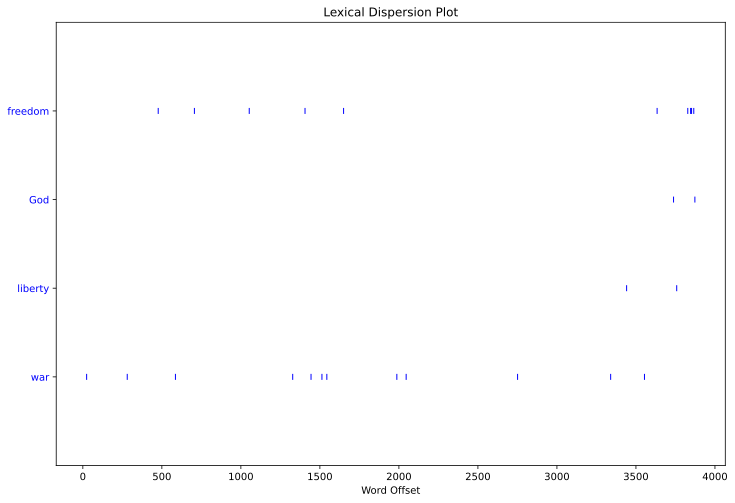

In [48]:
text1.dispersion_plot(["freedom", "God", "liberty", "war"])

In [49]:
text1.similar("freedom")

shock terror weapons september soldiers peace firefighters charities
service americorps learning suicide


<h3 style="color:blue;">Exercises for Part VII</h3>
    
<p style="color:blue;">Read the tokens from sotu2 into nltk.Text. Then try applying some of the nltk functions introduced above.</p>